---
# 머신러닝 회귀 ( Regression )
회귀는 연속적인 값을 예측

- LinearRegression
- DecisionTreeRegressor
- RandomForestRegressor
- SVR

평가에는 MSE ( Mean Squared Error ) 를 사용

---
# 데이터 불러오기

In [21]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/abalone.csv").drop("id", axis=1)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


---
# 데이터 전처리

- 결측치 확인
- 결측치 제거 ( 제거, 평균값 이용 )
- 스케일링
- 레이블인코딩
- 필요없는 컬럼 삭제 ( drop )

In [23]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [26]:
df["Rings"].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


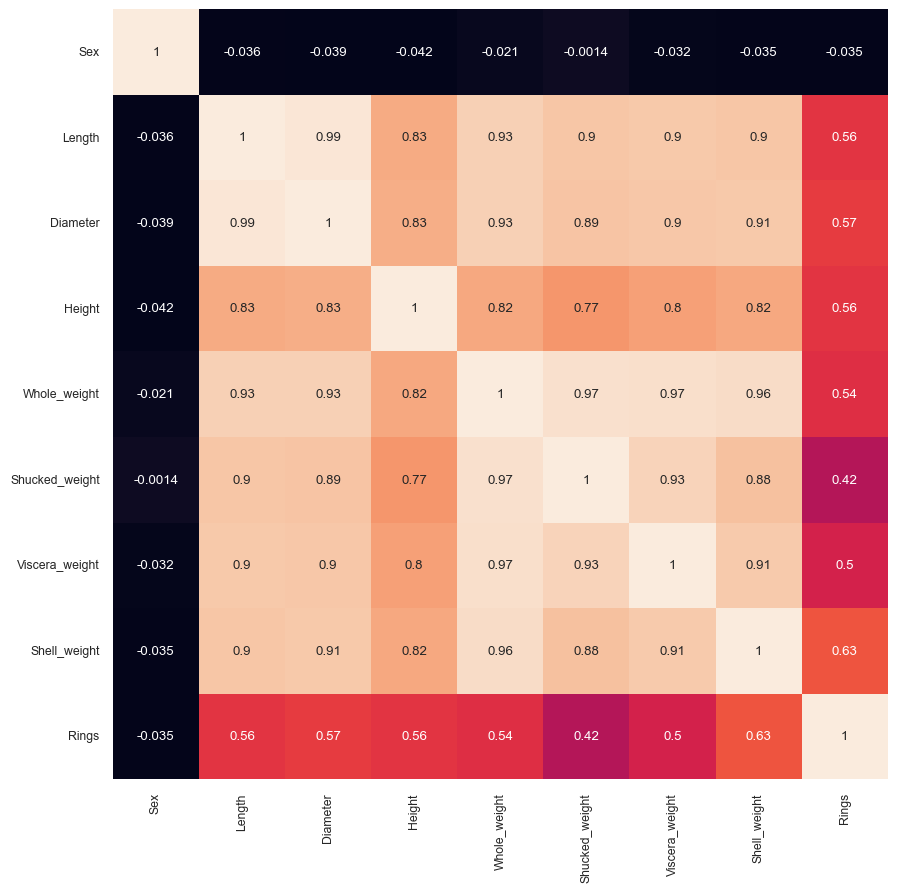

In [84]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

import matplotlib.pyplot as plt
import seaborn as sns
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [140]:
X = df.drop(["Rings", "Sex"], axis=1)
Y = df["Rings"]

X, Y

(      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
 0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
 ...      ...       ...     ...           ...             ...             ...   
 4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
 4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
 4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
 4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
 4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   
 
       Shell_weight  
 0  

In [105]:
# from sklearn.preprocessing import StandardScaler
# # Standardize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42) 
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((2923, 7), (1254, 7), (2923,), (1254,))

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [146]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean = mean_squared_error(y_test, y_pred)
print(f'LinearRegression  -  {mean}')

LinearRegression  -  4.924934526360623


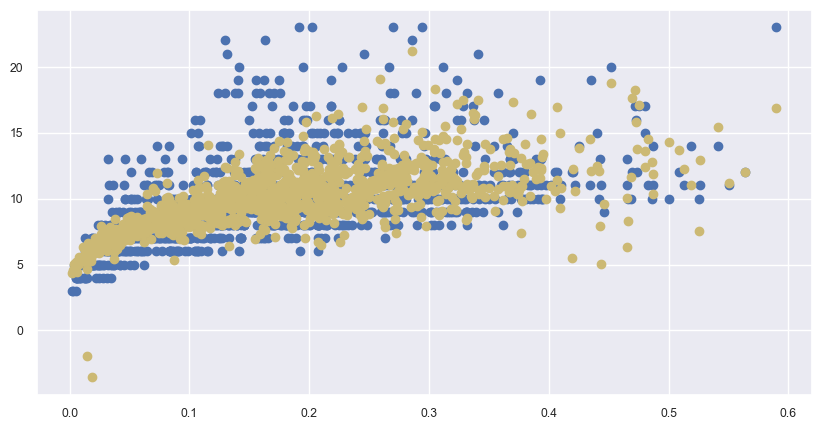

In [154]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Viscera_weight'], y_test, label='y_test')
plt.scatter(X_test['Viscera_weight'], y_pred, c='y', label='preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')

plt.show()    

In [156]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean = mean_squared_error(y_test, y_pred)
print(f'DecisionTreeRegression  -  {mean}')

DecisionTreeRegression  -  9.030303030303031


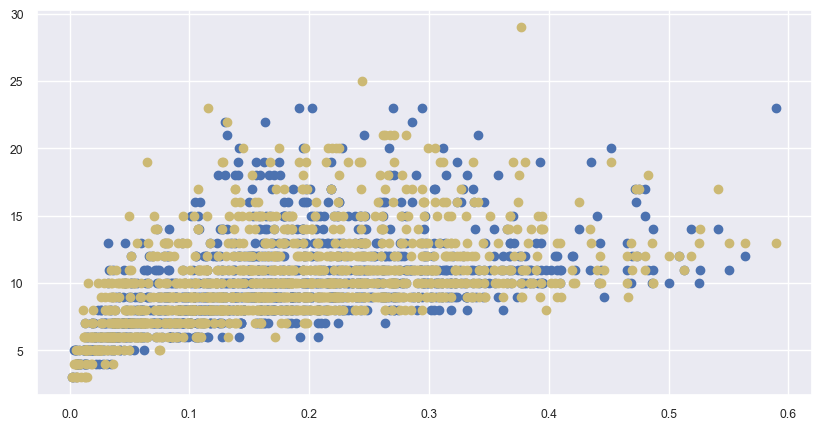

In [158]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Viscera_weight'], y_test, label='y_test')
plt.scatter(X_test['Viscera_weight'], y_pred, c='y', label='preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')

plt.show()    

In [160]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean = mean_squared_error(y_test, y_pred)
print(f'RandomForestRegressor  -  {mean}')

RandomForestRegressor  -  4.8522102870813395


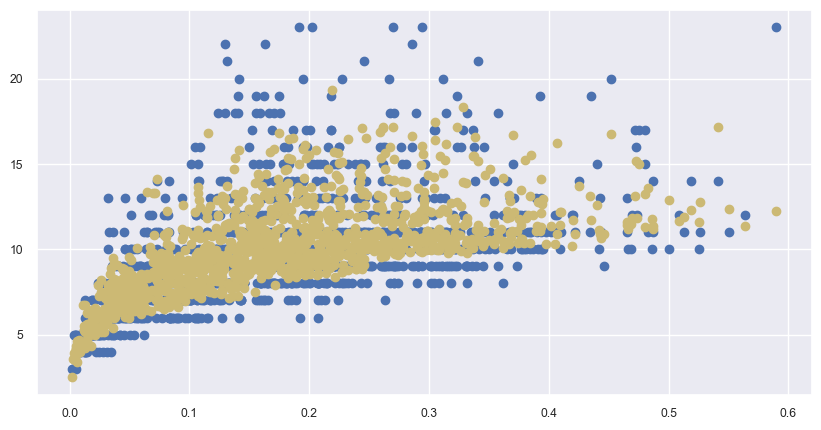

In [161]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Viscera_weight'], y_test, label='y_test')
plt.scatter(X_test['Viscera_weight'], y_pred, c='y', label='preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')

plt.show()    

In [164]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
mean = mean_squared_error(y_test, y_pred)
print(f'SVR  -  {mean}')

SVR  -  4.8522102870813395


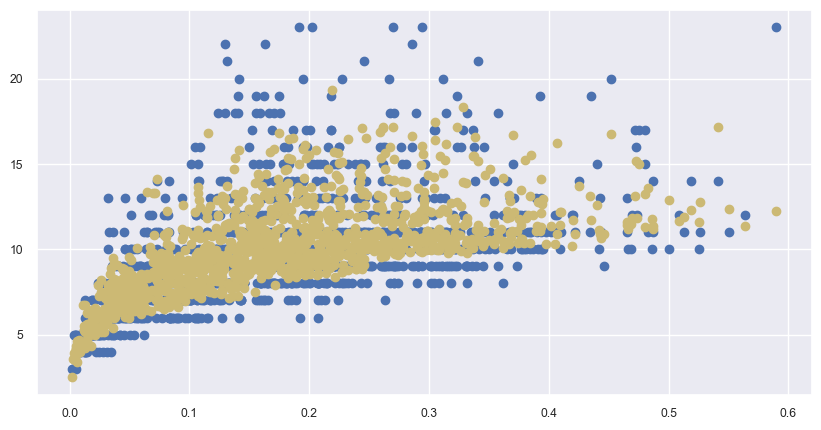

In [166]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Viscera_weight'], y_test, label='y_test')
plt.scatter(X_test['Viscera_weight'], y_pred, c='y', label='preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')

plt.show()    